#### 3. Import the required packages with their customary aliases as follows:

    `import pandas as pd`   
    `import numpy as np`  
    `import matplotlib.pyplot as plt`  
    `import seaborn as sns`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### 4.	Use the `%matplotlib inline` magic command so that your plots show in the notebook _without_ having to call `plt.show()` every time.

In [2]:
%matplotlib inline

#### 5.	Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. Take a look at the first 6 rows.

In [3]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv', nrows = 6868)
gdp_df.head(6)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,2065.036398,NaN
1,Afghanistan,2018,2033.779002,NaN
2,Afghanistan,2017,2058.383832,NaN
3,Afghanistan,2016,2057.062164,NaN
4,Afghanistan,2015,2068.265904,NaN
5,Afghanistan,2014,2102.385234,NaN


In [4]:
gdp_df.tail()

,Country or Area,Year,Value,Value Footnotes
6863,Zimbabwe,1994,3263.934978,NaN
6864,Zimbabwe,1993,3033.504852,NaN
6865,Zimbabwe,1992,3054.889178,NaN
6866,Zimbabwe,1991,3426.598094,NaN
6867,Zimbabwe,1990,3324.348171,NaN


#### 6. Repeat for the internet use dataset. Call this DataFrame `internet_df`. Take a look at the first six rows.

In [5]:
internet_df = pd.read_csv('../data/internet_use.csv', nrows = 4495)
internet_df.head(6)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN
5,Afghanistan,2009,3.550000,NaN


I was getting this error for #6:

ParserError: Error tokenizing data. C error: Expected 4 fields in line 4675, saw 6

After some googling, I decided the easiest thing was to delete the relevant lines in the data file because the issue was with the footnote lines which we aren't going to use anyway. Essentially, when reading in a csv, it looks at how many columns there are in the first row, and expects that many columns all the way down. The error above indicates that there are linew with more columns than that (in this case, 6 instead of 4), and it doesn't know what to do with that.

#### Addendum:
Chris referenced needing to find a method that allows us to just read in up to a certain row in the csv file we want to use. I found the method that is now in place above. I redownloaded the data for internet usage so that the csv would be complete, but just read in the relevant lines needed.

In [6]:
internet_df.tail()

,Country or Area,Year,Value,Value Footnotes
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN
4494,Zimbabwe,1990,0.000000,NaN


#### 98. Look at the shape of each DataFrame - how many rows? How many columns?

In [7]:
gdp_df.shape

(6868, 4)

gdp_df has 6868 rows and 4 columns

In [8]:
internet_df.shape

(4495, 4)

internet_df has 4495rows and 4 columns

#### 6.	Take a look at the datatypes for the columns in each DataFrame.

In [9]:
gdp_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

gdp_df

Country or Area = object

Year = int64

Value = float64

Value Footnotes = float64

In [10]:
internet_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

internet_df

Country or Area = object

Year = int64

Value = float64

Value Footnotes = float64

#### 99. Take a look at the last 10 rows of each DataFrame in turn.

In [11]:
gdp_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
6858,Zimbabwe,1999,3600.849291,NaN
6859,Zimbabwe,1998,3653.920016,NaN
6860,Zimbabwe,1997,3580.048793,NaN
6861,Zimbabwe,1996,3520.430146,NaN
6862,Zimbabwe,1995,3226.413930,NaN
6863,Zimbabwe,1994,3263.934978,NaN
6864,Zimbabwe,1993,3033.504852,NaN
6865,Zimbabwe,1992,3054.889178,NaN
6866,Zimbabwe,1991,3426.598094,NaN
6867,Zimbabwe,1990,3324.348171,NaN


In [12]:
internet_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
4485,Zimbabwe,2002,3.994356,NaN
4486,Zimbabwe,2001,0.799846,NaN
4487,Zimbabwe,2000,0.401434,NaN
4488,Zimbabwe,1999,0.161676,NaN
4489,Zimbabwe,1998,0.081648,NaN
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN
4494,Zimbabwe,1990,0.000000,NaN


#### 7.	Drop the `value footnotes` column from both DataFrames. Check that this worked as expected.

In [13]:
gdp_df = gdp_df.drop(columns = ['Value Footnotes'])
gdp_df.columns

Index(['Country or Area', 'Year', 'Value'], dtype='object')

In [14]:
internet_df = internet_df.drop(columns = ['Value Footnotes'])
internet_df.columns

Index(['Country or Area', 'Year', 'Value'], dtype='object')

#### 8.	Change the columns for the GDP Per Capita DataFrame to ‘Country’, ‘Year’, and ‘GDP_Per_Capita’.

In [15]:
gdp_df = gdp_df.rename(columns = { 'Country or Area' : 'Country',
                                   'Value' : 'GDP_Per_Capita'})
gdp_df.columns

Index(['Country', 'Year', 'GDP_Per_Capita'], dtype='object')

#### 9.	Change the columns for the Internet Users DataFrame to ‘Country’, ‘Year’, and ‘Internet_Users_Pct’.

In [16]:
internet_df = internet_df.rename(columns = { 'Country or Area' : 'Country',
                                             'Value' : 'Internet_Users_Pct'})
internet_df.columns

Index(['Country', 'Year', 'Internet_Users_Pct'], dtype='object')

#### 10.	Merge the two DataFrames to one. Merge **all rows** from each of the two DataFrames. Call the new DataFrame `gdp_and_internet_use`.
#### 11.	Look at the first five rows of your new DataFrame to confirm it merged correctly.

In [17]:
gdp_and_internet_use = pd.merge(gdp_df, internet_df, how = "outer", on = ["Country", "Year"])
gdp_and_internet_use.head(15)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2019,2065.036398,NaN
1,Afghanistan,2018,2033.779002,NaN
2,Afghanistan,2017,2058.383832,NaN
3,Afghanistan,2016,2057.062164,NaN
4,Afghanistan,2015,2068.265904,NaN
5,Afghanistan,2014,2102.385234,6.390000
6,Afghanistan,2013,2116.465454,5.900000
7,Afghanistan,2012,2075.491747,5.454545
8,Afghanistan,2011,1904.559799,5.000000
9,Afghanistan,2010,1957.029338,4.000000


#### 12.	Look at the last five rows to make sure the data is clean and as expected.

In [18]:
gdp_and_internet_use.tail(15)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
7890,Yemen,2009,NaN,9.960000
7891,Yemen,2008,NaN,6.890000
7892,Yemen,2007,NaN,5.010000
7893,Yemen,2006,NaN,1.247824
7894,Yemen,2005,NaN,1.048598
7895,Yemen,2004,NaN,0.881223
7896,Yemen,2003,NaN,0.604734
7897,Yemen,2002,NaN,0.518796
7898,Yemen,2001,NaN,0.090802
7899,Yemen,2000,NaN,0.082500


#### Notes to self re. pd.merge()

Pandas provides a single function, merge, as the entry point for all standard database join operations between DataFrame objects −

pd.merge(left, right, how='inner', on=None, left_on=None, right_on=None,
left_index=False, right_index=False, sort=True)

Here, we have used the following parameters −

left − A DataFrame object.

right − Another DataFrame object.

on − Columns (names) to join on. Must be found in both the left and right DataFrame objects.

left_on − Columns from the left DataFrame to use as keys. Can either be column names or arrays with length equal to the length of the DataFrame.

right_on − Columns from the right DataFrame to use as keys. Can either be column names or arrays with length equal to the length of the DataFrame.

left_index − If True, use the index (row labels) from the left DataFrame as its join key(s). In case of a DataFrame with a MultiIndex (hierarchical), the number of levels must match the number of join keys from the right DataFrame.

right_index − Same usage as left_index for the right DataFrame.

how − One of 'left', 'right', 'outer', 'inner'. Defaults to inner. Each method has been described below.

sort − Sort the result DataFrame by the join keys in lexicographical order. Defaults to True, setting to False will improve the performance substantially in many cases.

#### 13.	Subset the combined DataFrame to keep only the data for 2004, 2009, and 2014. Check that this happened correctly.
I played with three different ways to do this
1. Using .query and a reference to an external list
2. Using .loc and isin (99% of the time can do without .loc, but there will be rare instances that without it things won't be correct, but it won't throw an error or anything, so best practice to use it)
3. Creating a boolean series to use as a filter via .isin then applying the filter to the dataframe

Discussions about .loc vs. just brackets:

https://stackoverflow.com/questions/48409128/what-is-the-difference-between-using-loc-and-using-just-square-brackets-to-filte

https://stackoverflow.com/questions/38886080/python-pandas-series-why-use-loc/38886211#38886211

In [19]:
year_list = [2004, 2009, 2014]
gdp_internet_limited = gdp_and_internet_use.query('Year in @year_list')
gdp_internet_limited

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
5,Afghanistan,2014,2102.385234,6.390000
10,Afghanistan,2009,1758.904043,3.550000
15,Afghanistan,2004,1200.278256,0.105809
23,Albania,2014,11623.866679,60.100000
28,Albania,2009,10346.864199,41.200000
...,...,...,...,...
7868,Virgin Islands (U.S.),2009,NaN,27.396510
7873,Virgin Islands (U.S.),2004,NaN,27.377009
7885,Yemen,2014,NaN,22.550000
7890,Yemen,2009,NaN,9.960000


In [25]:
gdp_internet_ltd = gdp_and_internet_use.loc[gdp_and_internet_use['Year'].isin([2004, 2009, 2014])]
gdp_internet_ltd

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
5,Afghanistan,2014,2102.385234,6.390000
10,Afghanistan,2009,1758.904043,3.550000
15,Afghanistan,2004,1200.278256,0.105809
23,Albania,2014,11623.866679,60.100000
28,Albania,2009,10346.864199,41.200000
...,...,...,...,...
7868,Virgin Islands (U.S.),2009,NaN,27.396510
7873,Virgin Islands (U.S.),2004,NaN,27.377009
7885,Yemen,2014,NaN,22.550000
7890,Yemen,2009,NaN,9.960000


In [21]:
year_filter = gdp_and_internet_use['Year'].isin([2004, 2009, 2014])
g_i_ltd_again = gdp_and_internet_use[year_filter]
g_i_ltd_again

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
5,Afghanistan,2014,2102.385234,6.390000
10,Afghanistan,2009,1758.904043,3.550000
15,Afghanistan,2004,1200.278256,0.105809
23,Albania,2014,11623.866679,60.100000
28,Albania,2009,10346.864199,41.200000
...,...,...,...,...
7868,Virgin Islands (U.S.),2009,NaN,27.396510
7873,Virgin Islands (U.S.),2004,NaN,27.377009
7885,Yemen,2014,NaN,22.550000
7890,Yemen,2009,NaN,9.960000


#### 14.	Create three new DataFrames, one for 2004, one for 2009, and one for 2014. Give them meaningful names that aren't too long.
Played with a couple of different ways here too

In [26]:
gi_2004 = gdp_internet_ltd.loc[gdp_internet_ltd['Year'] == 2004]
gi_2004

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
15,Afghanistan,2004,1200.278256,0.105809
33,Albania,2004,7604.838002,2.420388
63,Algeria,2004,10058.435939,4.634475
93,Angola,2004,5593.241537,0.464815
123,Antigua and Barbuda,2004,18745.681534,24.266544
...,...,...,...,...
7771,T.F.Y.R. Macedonia,2004,NaN,24.440000
7829,Venezuela,2004,NaN,8.404470
7853,Viet Nam,2004,NaN,7.642409
7873,Virgin Islands (U.S.),2004,NaN,27.377009


In [23]:
gi_2009 = gdp_internet_ltd.query('Year == 2009')
gi_2009

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
10,Afghanistan,2009,1758.904043,3.55000
28,Albania,2009,10346.864199,41.20000
58,Algeria,2009,10782.361398,11.23000
88,Angola,2009,7643.493749,6.00000
118,Antigua and Barbuda,2009,20046.839017,42.00000
...,...,...,...,...
7766,T.F.Y.R. Macedonia,2009,NaN,51.77000
7824,Venezuela,2009,NaN,32.70000
7848,Viet Nam,2009,NaN,26.55000
7868,Virgin Islands (U.S.),2009,NaN,27.39651


In [24]:
gi_2014 = gdp_internet_ltd.query('Year == 2014')
gi_2014

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
5,Afghanistan,2014,2102.385234,6.39
23,Albania,2014,11623.866679,60.10
53,Algeria,2014,11512.705405,18.09
83,Angola,2014,8239.828837,21.26
113,Antigua and Barbuda,2014,18104.241470,64.00
...,...,...,...,...
7761,T.F.Y.R. Macedonia,2014,NaN,68.06
7819,Venezuela,2014,NaN,57.00
7843,Viet Nam,2014,NaN,48.31
7863,Virgin Islands (U.S.),2014,NaN,50.07


#### 15.	Which country had the highest percentage of internet users in 2014? What was the percentage? (Try typing the first 3 letters of your DataFrame name and hitting the tab key for auto-complete options).

In [34]:
gi_2014 = gi_2014.sort_values(by = 'Internet_Users_Pct', ascending = False)
gi_2014.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
2625,Iceland,2014,49652.149500,98.16
561,Bermuda,2014,77361.104881,96.80
4648,Norway,2014,62589.373548,96.30
1452,Denmark,2014,52214.537753,95.99
6871,Andorra,2014,NaN,95.90


Iceland had the highest percentage of internet users in 2014 with 98.16%

#### 16.	Which country had the lowest percentage of internet users in 2014? What was the percentage?

In [35]:
gi_2014 = gi_2014.sort_values(by = 'Internet_Users_Pct', ascending = True)
gi_2014.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
7079,Dem. People's Rep. of Korea,2014,NaN,0.00
7137,Eritrea,2014,NaN,0.99
6219,Timor-Leste,2014,3264.568070,1.14
827,Burundi,2014,886.235777,1.38
7674,Somalia,2014,NaN,1.63


Dem. People's Rep. of Korea has the lowest percentage of internet users in 2014 with 0%

#### 17.	Repeat for 2004 and 2009.

In [33]:
gi_2004 = gi_2004.sort_values(by = 'Internet_Users_Pct', ascending = False)
gi_2004.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
6019,Sweden,2004,44496.023401,83.89
2635,Iceland,2004,45145.545658,83.88
1462,Denmark,2004,50607.628971,80.93
4658,Norway,2004,60893.410993,77.69
7400,Korea (Rep. of),2004,NaN,72.70


In 2004, Sweden had the highest with 83.89%

In [36]:
gi_2004 = gi_2004.sort_values(by = 'Internet_Users_Pct', ascending = True)
gi_2004.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
7088,Dem. People's Rep. of Korea,2004,NaN,0.000000
4342,Myanmar,2004,1696.881760,0.024337
3545,Liberia,2004,1181.546158,0.031011
6079,Tajikistan,2004,1737.743630,0.077480
15,Afghanistan,2004,1200.278256,0.105809


In 2004, Dem. People's Re. of Korea had the lowest with 0%

In [37]:
gi_2009 = gi_2009.sort_values(by = 'Internet_Users_Pct', ascending = False)
gi_2009.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
2630,Iceland,2009,48177.084123,93.00
4653,Norway,2009,61886.564498,92.08
6014,Sweden,2009,45638.035577,91.00
4443,Netherlands,2009,51772.424928,89.63
3696,Luxembourg,2009,104932.811953,87.31


In 2009 Iceland had the highest with 93%

In [38]:
gi_2009 = gi_2009.sort_values(by = 'Internet_Users_Pct', ascending = True)
gi_2009.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
7083,Dem. People's Rep. of Korea,2009,NaN,0.000000
6224,Timor-Leste,2009,2724.770973,0.185252
4337,Myanmar,2009,2874.780227,0.220000
5439,Sierra Leone,2009,1372.392285,0.260000
922,Cambodia,2009,2603.583778,0.530000


In 2004, Dem. People's Re. of Korea had the lowest with 0%

#### 18.	Which country had the highest gdp per capita in 2014? What was the gdp per capita?

In [40]:
gi_2014 = gi_2014.sort_values(by = 'GDP_Per_Capita', ascending = False)
gi_2014.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
3721,"Macao SAR, China",2014,156514.133850,NaN
3691,Luxembourg,2014,108760.916030,94.67
5138,Qatar,2014,95578.416973,91.49
5464,Singapore,2014,87808.663157,82.00
561,Bermuda,2014,77361.104881,96.80


Macao SAR, China had the highest with 156514.13

#### 20.	Which country had the lowest gdp per capita in 2014? What was the gdp per capita?

In [41]:
gi_2014 = gi_2014.sort_values(by = 'GDP_Per_Capita', ascending = True)
gi_2014.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
1047,Central African Republic,2014,822.610458,NaN
827,Burundi,2014,886.235777,1.38
3781,Malawi,2014,1027.208496,5.83
1422,Dem. Rep. Congo,2014,1029.790785,NaN
4528,Niger,2014,1127.615541,1.95


Central African Republic with 822.61

#### 21.	Create some scatterplots:  
    a.  2004 Percent Using the Internet vs GDP Per Capita  
    b.	2009 Percent Using the Internet vs GDP Per Capita  
    c.	2014 Percent Using the Internet vs GDP Per Capita  

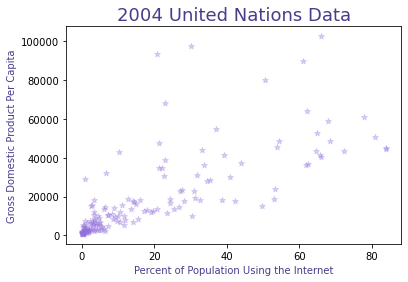

In [43]:
plt.scatter(gi_2004['Internet_Users_Pct'], gi_2004['GDP_Per_Capita'], 
            color = 'MediumPurple',
            marker = '*',
            alpha = 0.3)
plt.xlabel('Percent of Population Using the Internet', color = 'DarkSlateBlue')
plt.ylabel('Gross Domestic Product Per Capita', color = 'DarkSlateBlue')
plt.title('2004 United Nations Data', fontsize = 18, color = 'DarkSlateBlue');

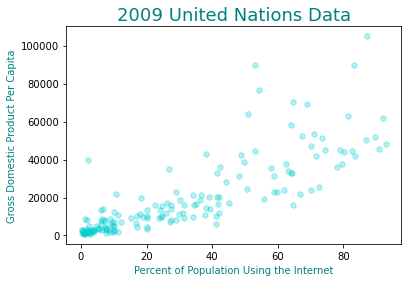

In [44]:
plt.scatter(gi_2009['Internet_Users_Pct'], gi_2009['GDP_Per_Capita'], 
            color = 'DarkTurquoise',
            marker = 'h',
            alpha = 0.3)
plt.xlabel('Percent of Population Using the Internet', color = 'Teal')
plt.ylabel('Gross Domestic Product Per Capita', color = 'Teal')
plt.title('2009 United Nations Data', fontsize = 18, color = 'Teal');

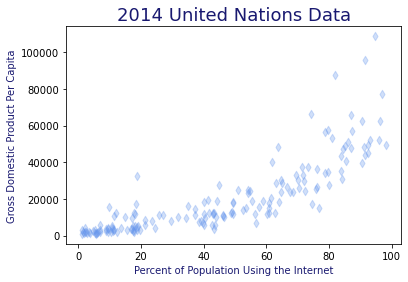

In [45]:
plt.scatter(gi_2014['Internet_Users_Pct'], gi_2014['GDP_Per_Capita'], 
            color = 'CornflowerBlue',
            marker = 'd',
            alpha = 0.3)
plt.xlabel('Percent of Population Using the Internet', color = 'MidnightBlue')
plt.ylabel('Gross Domestic Product Per Capita', color = 'MidnightBlue')
plt.title('2014 United Nations Data', fontsize = 18, color = 'MidnightBlue');

#### 22.	Are there differences across years? What do the plots tell you about any relationship between these two variables? Enter your observations as a markdown cell.

The scatter lessens as the years go on towards what looks to my eye like an exponential pattern such that wealthier nations very clearly have higher levels of internet use among their populations. The concentration of lower GDP nations with low internet usage continues, but it's not as tight of a cluster as the years go on.

#### 23.	Look at the distribution of gdp per capita values for 2014. Is it unimodal?

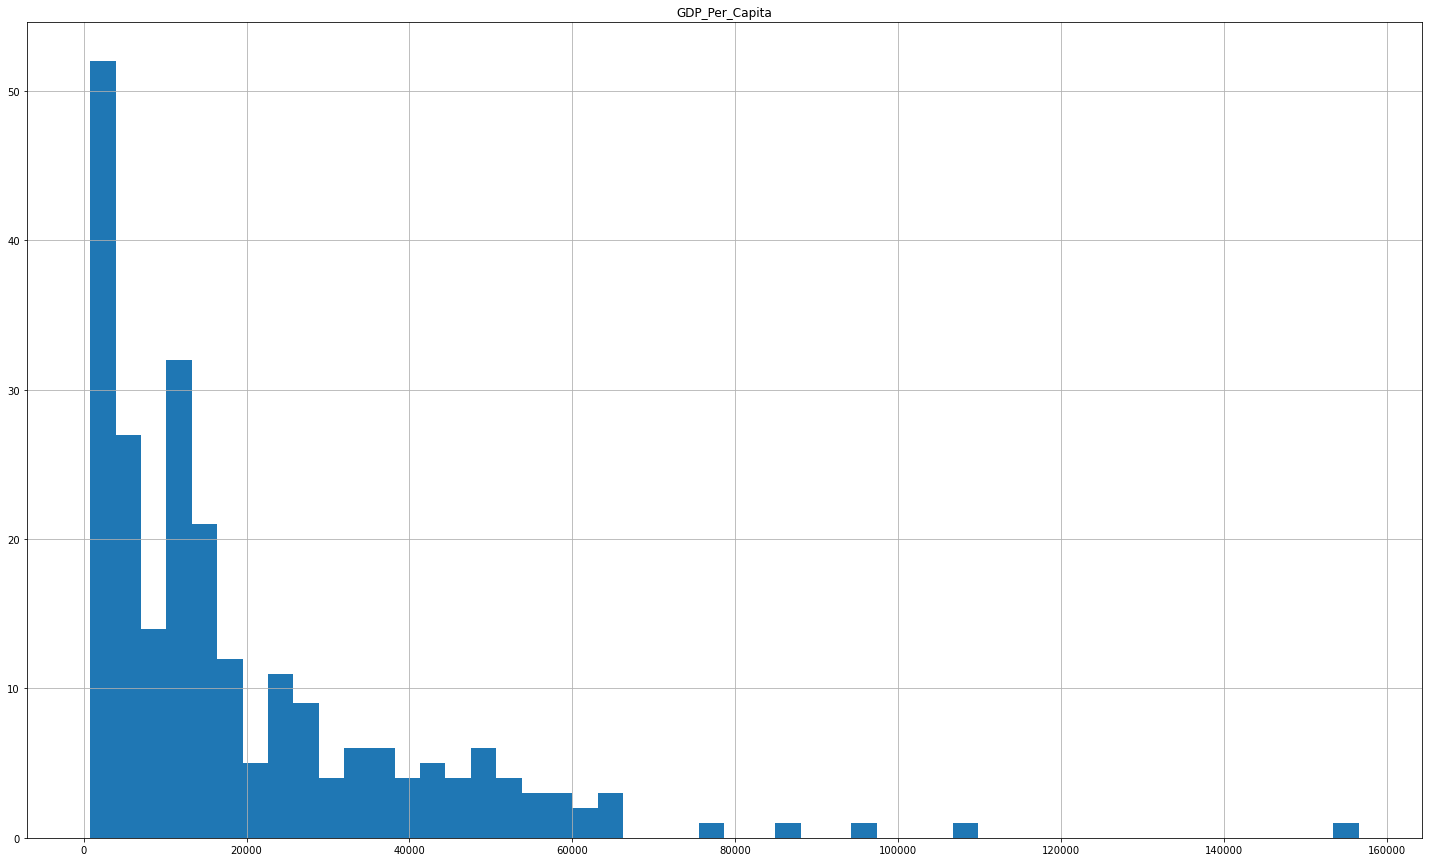

In [56]:
gi_2014.hist(column = 'GDP_Per_Capita', bins = 50, figsize = (25, 15));

C:\Users\mews2\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GDP_Per_Capita', ylabel='Density'>

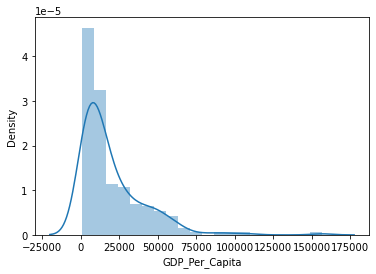

In [55]:
sns.distplot(gi_2014['GDP_Per_Capita'], bins = 20)

In [53]:
gi_2014.mode(numeric_only = True)

,Year,GDP_Per_Capita,Internet_Users_Pct
0,2014.0,3791.254491,2.1
1,NaN,4846.185729,9.0
2,NaN,NaN,11.0
3,NaN,NaN,43.0
4,NaN,NaN,43.4
5,NaN,NaN,61.0


There is one clear peak, so yes, this is a unimodal distribution, clustered at the low end of GDP

#### 24.	Look at the distribution of Internet Use for 2014. Is it unimodal?

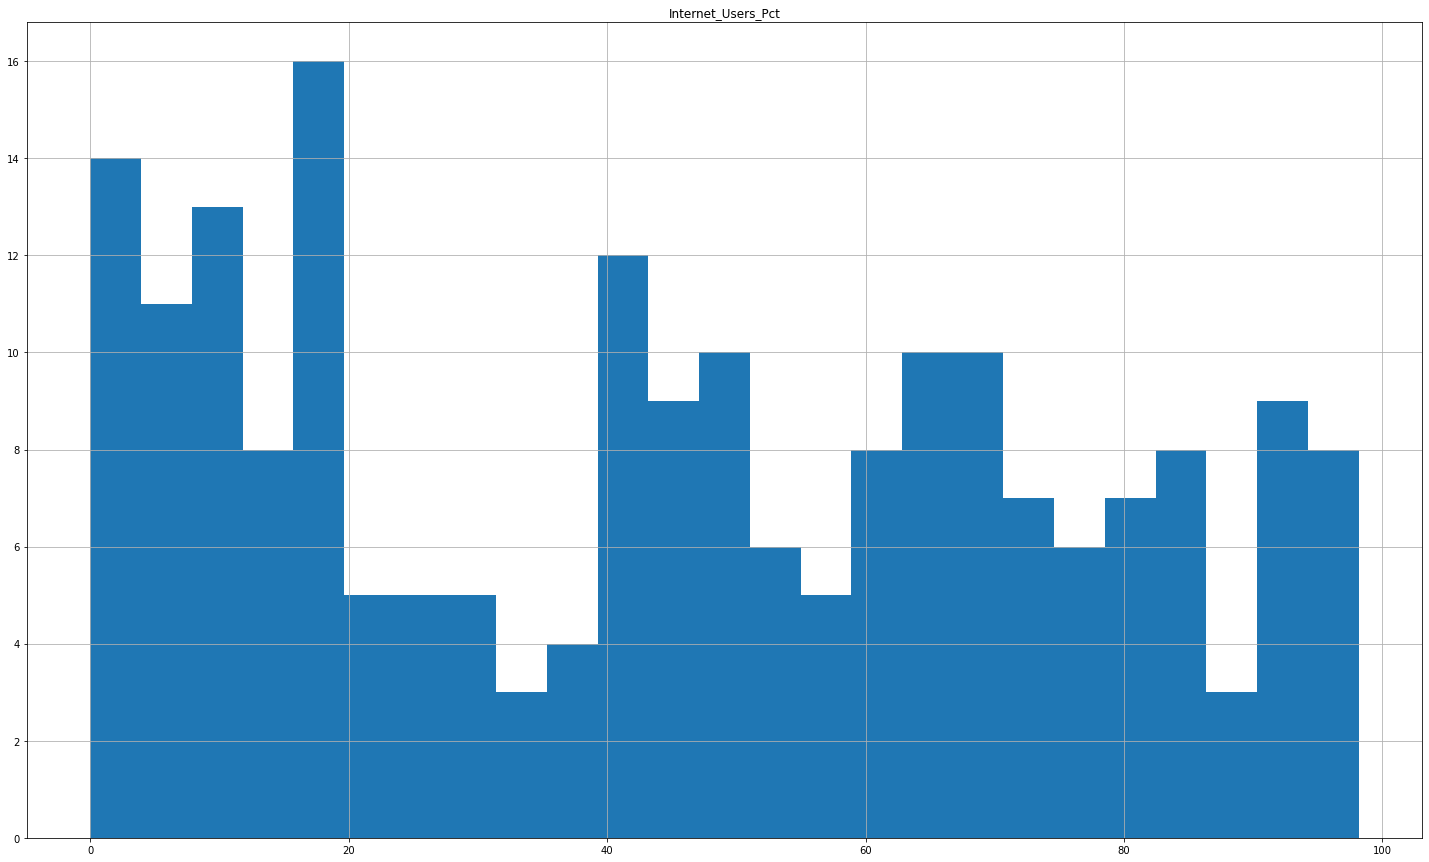

In [60]:
gi_2014.hist(column = 'Internet_Users_Pct', bins = 25, figsize = (25, 15));

C:\Users\mews2\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Internet_Users_Pct', ylabel='Density'>

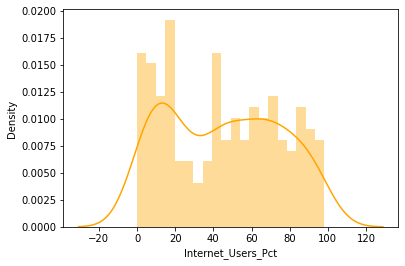

In [59]:
sns.distplot(gi_2014['Internet_Users_Pct'], bins = 20, color = 'orange')

This isn't a textbook example, but reasonably could be called a bimodal distribution

#### 25.	What are the top 5 countries in terms of internet use in 2014?

In [61]:
gi_2014.sort_values(by = 'Internet_Users_Pct', ascending = False).head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
2625,Iceland,2014,49652.149500,98.16
561,Bermuda,2014,77361.104881,96.80
4648,Norway,2014,62589.373548,96.30
1452,Denmark,2014,52214.537753,95.99
6871,Andorra,2014,NaN,95.90


Iceland, Bermuda, Norway, Denmark, Andorra

#### Create a DataFrame called top_5_internet **from the combined DataFrame that has all three years _for the 5 countries that had the greatest 2014 internet usage_**. You should have 15 rows. Check that this is true.

In [46]:
top_5_countries = ['Iceland', 'Bermuda', 'Norway', 'Denmark', 'Andorra']
top_5_internet = gdp_internet_ltd.query('Country in @top_5_countries')
top_5_internet

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
561,Bermuda,2014,77361.104881,96.800000
566,Bermuda,2009,89961.982744,83.250000
571,Bermuda,2004,90195.811033,60.990867
1452,Denmark,2014,52214.537753,95.990000
1457,Denmark,2009,50274.075696,86.840000
1462,Denmark,2004,50607.628971,80.930000
2625,Iceland,2014,49652.149500,98.160000
2630,Iceland,2009,48177.084123,93.000000
2635,Iceland,2004,45145.545658,83.880000
4648,Norway,2014,62589.373548,96.300000


#### 27.	Create a seaborn FacetGrid to show the internet usage trend across the years 2004, 2009, and 2014 for these 5 countries (those with the highest reported internet use in 2014). Which country had the greatest growth between 2004 and 2014?

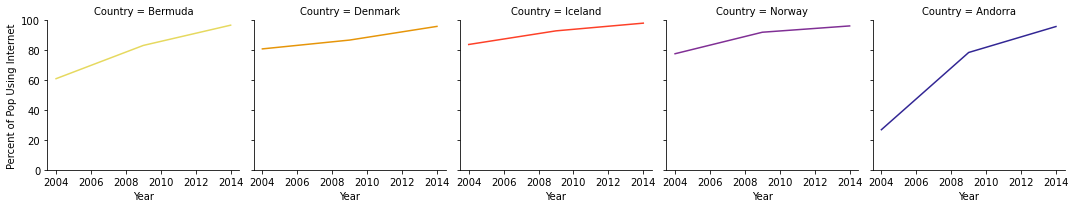

In [47]:
ti = sns.FacetGrid(top_5_internet, col="Country", hue="Country", palette = 'CMRmap_r')
ti.map_dataframe(sns.lineplot, x="Year", y="Internet_Users_Pct")
ti.set_axis_labels("Year", "Percent of Pop Using Internet")
ti.set(ylim=(0, 100));

Andorra
had the greatest growth from 2004 to 2014

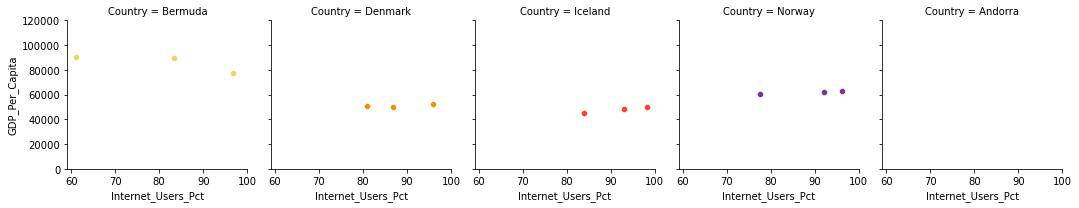

In [48]:
tis = sns.FacetGrid(top_5_internet, col="Country", hue="Country", palette = 'CMRmap_r')
tis.map_dataframe(sns.scatterplot, x="Internet_Users_Pct", y="GDP_Per_Capita")
tis.set(ylim=(0, 120000));

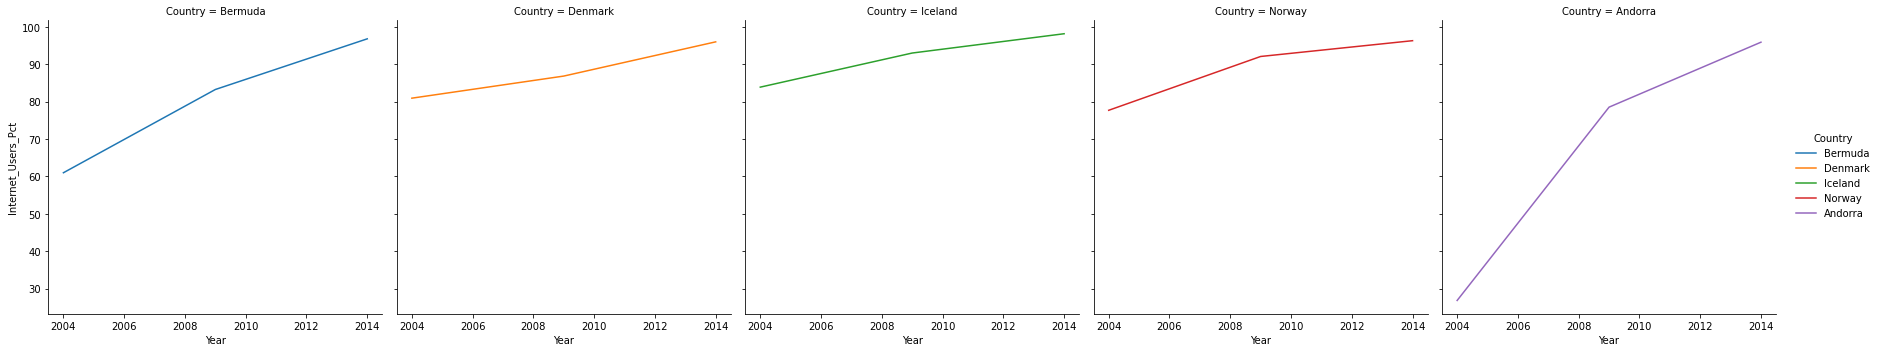

In [75]:
sns.relplot(data = top_5_internet, x = "Year", y = "Internet_Users_Pct", kind = "line", col = "Country", hue = "Country")

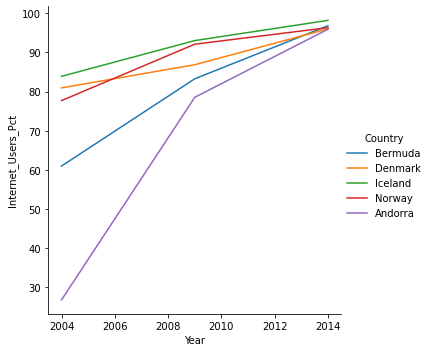

In [77]:
sns.relplot(data = top_5_internet, x = "Year", y = "Internet_Users_Pct", kind = "line", hue = "Country");

#### 27.	28.	Repeat the steps above to look at the trend for the 5 countries with the lowest 2014 internet usage. Which country has consistently had the least internet use?

In [62]:
gi_2014.sort_values(by = 'Internet_Users_Pct', ascending = True).head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
7079,Dem. People's Rep. of Korea,2014,NaN,0.00
7137,Eritrea,2014,NaN,0.99
6219,Timor-Leste,2014,3264.568070,1.14
827,Burundi,2014,886.235777,1.38
7674,Somalia,2014,NaN,1.63


In [66]:
low_5_list = gi_2014.sort_values(by = 'Internet_Users_Pct', ascending = True).head()['Country']
low_5_list

7079    Dem. People's Rep. of Korea
7137                        Eritrea
6219                    Timor-Leste
827                         Burundi
7674                        Somalia
Name: Country, dtype: object

In [69]:
lowest_5_internet2 = gdp_internet_ltd.loc[gdp_internet_ltd['Country'].isin(low_5_list)]
lowest_5_internet2

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
827,Burundi,2014,886.235777,1.380000
832,Burundi,2009,831.564131,0.900000
837,Burundi,2004,817.460585,0.349060
6219,Timor-Leste,2014,3264.568070,1.140000
6224,Timor-Leste,2009,2724.770973,0.185252
6229,Timor-Leste,2004,2258.608056,NaN
7079,Dem. People's Rep. of Korea,2014,NaN,0.000000
7083,Dem. People's Rep. of Korea,2009,NaN,0.000000
7088,Dem. People's Rep. of Korea,2004,NaN,0.000000
7137,Eritrea,2014,NaN,0.990000


In [70]:
low_5_countries = ['Dem. People\'s Rep. of Korea', 'Eritrea', 'Timor-Leste', 'Burundi', 'Somalia']
lowest_5_internet = gdp_internet_ltd.query('Country in @low_5_countries')
lowest_5_internet
#Had to put the escape character in so that the ' in People's wasn't treated as an argument

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
827,Burundi,2014,886.235777,1.380000
832,Burundi,2009,831.564131,0.900000
837,Burundi,2004,817.460585,0.349060
6219,Timor-Leste,2014,3264.568070,1.140000
6224,Timor-Leste,2009,2724.770973,0.185252
6229,Timor-Leste,2004,2258.608056,NaN
7079,Dem. People's Rep. of Korea,2014,NaN,0.000000
7083,Dem. People's Rep. of Korea,2009,NaN,0.000000
7088,Dem. People's Rep. of Korea,2004,NaN,0.000000
7137,Eritrea,2014,NaN,0.990000


In [71]:
internet_df[internet_df['Country'] == 'Eritrea']

,Country,Year,Internet_Users_Pct
1256,Eritrea,2014,0.990000
1257,Eritrea,2013,0.900000
1258,Eritrea,2012,0.800000
1259,Eritrea,2011,0.700000
1260,Eritrea,2010,0.610000
1261,Eritrea,2009,0.540000
1262,Eritrea,2008,0.470000
1263,Eritrea,2007,0.410000
1264,Eritrea,2002,0.227090
1265,Eritrea,2001,0.157815


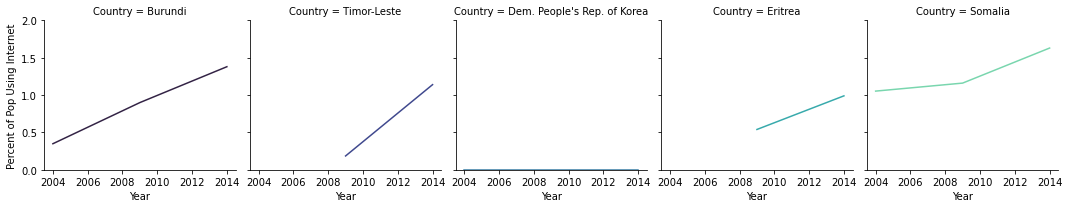

In [73]:
li = sns.FacetGrid(lowest_5_internet, col="Country", hue="Country", palette = 'mako')
li.map_dataframe(sns.lineplot, x="Year", y="Internet_Users_Pct")
li.set_axis_labels("Year", "Percent of Pop Using Internet")
li.set(ylim=(0, 2));

North Korea has consistently been the lowest. It's worth noting that there was no data for 2003 or 2004 or from 1991 through 2001.

#### 29.	Find the top 5 countries for 2014 in terms of GDP per capita; create a DataFrame to look at 10-year trends (use 2004, 2009, 2014 to look at the 10-year trend) in gdp per capita for the 5 countries with the highest 2014 GDP per capita. Use a seaborn facet grid for this.

In [78]:
gi_2014.sort_values(by = 'GDP_Per_Capita', ascending = False).head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
3721,"Macao SAR, China",2014,156514.133850,NaN
3691,Luxembourg,2014,108760.916030,94.67
5138,Qatar,2014,95578.416973,91.49
5464,Singapore,2014,87808.663157,82.00
561,Bermuda,2014,77361.104881,96.80


In [79]:
top_5_gcountries = ['Macao SAR, China', 'Luxembourg', 'Qatar', 'Singapore', 'Bermuda']
top_5_gdp = gdp_internet_ltd.query('Country in @top_5_gcountries')
top_5_gdp

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
561,Bermuda,2014,77361.104881,96.800000
566,Bermuda,2009,89961.982744,83.250000
571,Bermuda,2004,90195.811033,60.990867
3691,Luxembourg,2014,108760.916030,94.670000
3696,Luxembourg,2009,104932.811953,87.310000
3701,Luxembourg,2004,102708.212547,65.880000
3721,"Macao SAR, China",2014,156514.133850,NaN
3726,"Macao SAR, China",2009,95939.340822,NaN
3731,"Macao SAR, China",2004,72944.409424,NaN
5138,Qatar,2014,95578.416973,91.490000


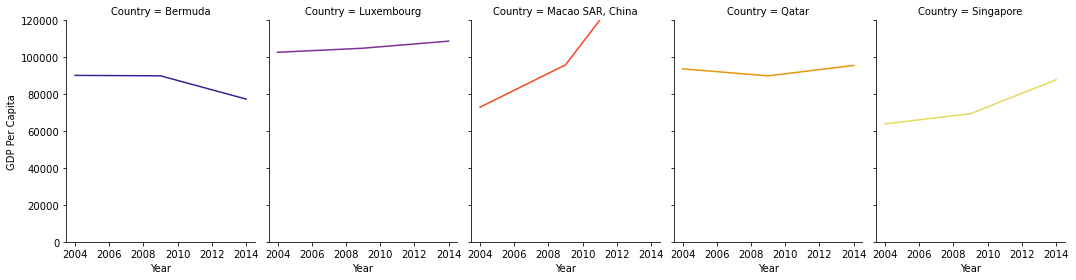

In [85]:
tg = sns.FacetGrid(top_5_gdp, col="Country", hue="Country", height = 4, aspect = .75, palette = 'CMRmap')
tg.map_dataframe(sns.lineplot, x="Year", y="GDP_Per_Capita")
tg.set_axis_labels("Year", "GDP Per Capita")
tg.set(ylim=(0, 120000));

#### Documentation on sizing seaborn figures:

https://seaborn.pydata.org/tutorial/function_overview.html#specifying-figure-sizes

#### 96. Repeat this one more time to look at 10-year trend for the 5 countries for 2014 with the lowest GDP per capita.

In [86]:
gi_2014.sort_values(by = 'GDP_Per_Capita').head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
1047,Central African Republic,2014,822.610458,NaN
827,Burundi,2014,886.235777,1.38
3781,Malawi,2014,1027.208496,5.83
1422,Dem. Rep. Congo,2014,1029.790785,NaN
4528,Niger,2014,1127.615541,1.95


In [88]:
low_g5_list = gi_2014.sort_values(by = 'GDP_Per_Capita').head()['Country']
low_g5_list

1047    Central African Republic
827                      Burundi
3781                      Malawi
1422             Dem. Rep. Congo
4528                       Niger
Name: Country, dtype: object

In [90]:
lowest_5_gdp = gdp_internet_ltd.loc[gdp_internet_ltd["Country"].isin(low_g5_list)]
lowest_5_gdp

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
827,Burundi,2014,886.235777,1.380000
832,Burundi,2009,831.564131,0.900000
837,Burundi,2004,817.460585,0.349060
1047,Central African Republic,2014,822.610458,NaN
1052,Central African Republic,2009,1161.189475,NaN
1057,Central African Republic,2004,1037.846766,NaN
1422,Dem. Rep. Congo,2014,1029.790785,NaN
1427,Dem. Rep. Congo,2009,835.611696,NaN
1432,Dem. Rep. Congo,2004,757.685942,NaN
3781,Malawi,2014,1027.208496,5.830000


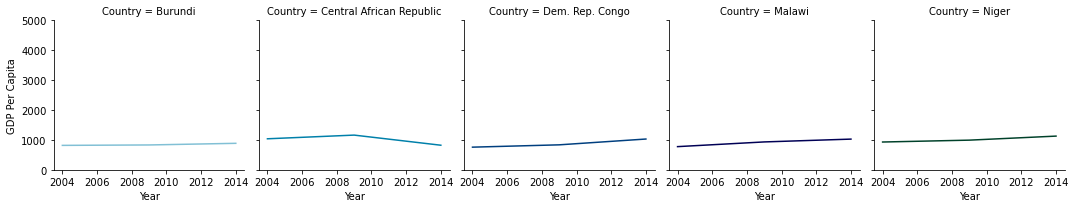

In [91]:
lg = sns.FacetGrid(lowest_5_gdp, col="Country", hue="Country", palette = 'ocean_r')
lg.map_dataframe(sns.lineplot, x="Year", y="GDP_Per_Capita")
lg.set_axis_labels("Year", "GDP Per Capita")
lg.set(ylim=(0, 5000));

#### 30.	Is there anything surprising or unusual in any of these plots? Searching on the internet, can you find any possible explanations for unusual findings?

In [92]:
whos% DataFrame

Variable               Type         Data/Info
---------------------------------------------
g_i_ltd_again          DataFrame                        Count<...>n\n[830 rows x 4 columns]
gdp_and_internet_use   DataFrame              Country  Year  <...>\n[7905 rows x 4 columns]
gdp_df                 DataFrame              Country  Year  <...>\n[6868 rows x 3 columns]
gdp_internet_limited   DataFrame                        Count<...>n\n[830 rows x 4 columns]
gdp_internet_ltd       DataFrame                        Count<...>n\n[830 rows x 4 columns]
gi_2004                DataFrame                             <...>n\n[276 rows x 4 columns]
gi_2009                DataFrame                             <...>n\n[277 rows x 4 columns]
gi_2014                DataFrame                           Co<...>n\n[277 rows x 4 columns]
internet_df            DataFrame              Country  Year  <...>\n[4495 rows x 3 columns]
lowest_5_gdp           DataFrame                           Co<...>83920         

### Bonus exercise:
1.    Download another data set from the UN data (http://data.un.org/Explorer.aspx) to merge with your data and explore.

In [93]:
pop_df = pd.read_csv('../data/population.csv', nrows = 11690)
pop_df

,Country or Area,Element,Year,Unit,Value,Value Footnotes
0,Afghanistan,Total Population - Both sexes,2019,1000 persons,38042.0,NaN
1,Afghanistan,Total Population - Both sexes,2018,1000 persons,37172.0,NaN
2,Afghanistan,Total Population - Both sexes,2017,1000 persons,36296.0,NaN
3,Afghanistan,Total Population - Both sexes,2016,1000 persons,35383.0,NaN
4,Afghanistan,Total Population - Both sexes,2015,1000 persons,34414.0,NaN
...,...,...,...,...,...,...
11685,Zimbabwe,Total Population - Both sexes,1965,1000 persons,4422.0,NaN
11686,Zimbabwe,Total Population - Both sexes,1964,1000 persons,4280.0,NaN
11687,Zimbabwe,Total Population - Both sexes,1963,1000 persons,4141.0,NaN
11688,Zimbabwe,Total Population - Both sexes,1962,1000 persons,4006.0,NaN


In [94]:
pop_df.value_counts('Element')
#checking to see what values are present under Element

Element
Total Population - Both sexes    11690
dtype: int64

In [95]:
pop_df = pop_df.rename(columns = {'Country or Area' : 'Country',
                                  'Value' : 'Pop_in_thousands'})
pop_df = pop_df.drop(columns = ['Element', 'Unit', 'Value Footnotes'])
pop_df

,Country,Year,Pop_in_thousands
0,Afghanistan,2019,38042.0
1,Afghanistan,2018,37172.0
2,Afghanistan,2017,36296.0
3,Afghanistan,2016,35383.0
4,Afghanistan,2015,34414.0
...,...,...,...
11685,Zimbabwe,1965,4422.0
11686,Zimbabwe,1964,4280.0
11687,Zimbabwe,1963,4141.0
11688,Zimbabwe,1962,4006.0


In [96]:
pop_df.describe()

,Year,Pop_in_thousands
count,11690.000000,1.169000e+04
mean,1990.912831,1.300098e+05
std,17.071734,5.045898e+05
min,1961.000000,3.400000e+01
25%,1976.000000,2.189500e+03
50%,1992.000000,9.717000e+03
75%,2006.000000,4.280525e+04
max,2019.000000,7.652392e+06


In [97]:
pop_df.sort_values(by="Pop_in_thousands")

,Country,Year,Pop_in_thousands
5626,Kiribati,1961,34.00
6861,Micronesia,1961,34.00
5625,Kiribati,1962,35.00
6860,Micronesia,1962,35.00
6859,Micronesia,1963,36.00
...,...,...,...
11427,World,2015,7324467.93
11426,World,2016,7407700.98
11425,World,2017,7490611.22
11424,World,2018,7572929.33


In [98]:
d = {'United States of America' : 'United States'}
pop_df = pop_df.replace(d)

In [99]:
gdp_int_pop_ltd = pd.merge(gdp_internet_ltd, pop_df, on = ['Country', 'Year'])
gdp_int_pop_ltd

,Country,Year,GDP_Per_Capita,Internet_Users_Pct,Pop_in_thousands
0,Afghanistan,2014,2102.385234,6.390000,33371.0
1,Afghanistan,2009,1758.904043,3.550000,27708.0
2,Afghanistan,2004,1200.278256,0.105809,24019.0
3,Albania,2014,11623.866679,60.100000,2896.0
4,Albania,2009,10346.864199,41.200000,3151.0
...,...,...,...,...,...
471,Viet Nam,2009,NaN,26.550000,88200.0
472,Viet Nam,2004,NaN,7.642409,84151.0
473,Yemen,2014,NaN,22.550000,25823.0
474,Yemen,2009,NaN,9.960000,22230.0


In [100]:
gdp_int_pop_ltd.sort_values(by="Pop_in_thousands")

,Country,Year,GDP_Per_Capita,Internet_Users_Pct,Pop_in_thousands
463,Saint Kitts and Nevis,2004,NaN,24.737678,48.00
461,Saint Kitts and Nevis,2014,NaN,65.400000,51.00
462,Saint Kitts and Nevis,2009,NaN,55.700000,52.00
49,Bermuda,2004,90195.811033,60.990867,64.00
48,Bermuda,2009,89961.982744,83.250000,65.00
...,...,...,...,...,...
88,China,2009,8069.354638,28.900000,1381857.00
87,China,2014,11917.338496,49.300000,1430671.00
432,World,2004,12077.823821,NaN,6313822.00
431,World,2009,13396.524163,NaN,6693385.00


In [101]:
gdp_int_pop_ltd.tail(25)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct,Pop_in_thousands
451,French Polynesia,2004,NaN,17.884537,252.0
452,Gambia,2014,NaN,15.560000,2024.0
453,Gambia,2009,NaN,7.630000,1628.0
454,Gambia,2004,NaN,3.308003,1392.0
455,Kyrgyzstan,2014,NaN,28.300000,5845.0
456,Kyrgyzstan,2009,NaN,16.000000,5265.0
457,Kyrgyzstan,2004,NaN,5.090385,5019.0
458,New Caledonia,2014,NaN,70.000000,268.0
459,New Caledonia,2009,NaN,33.990000,243.0
460,New Caledonia,2004,NaN,30.298046,225.0


In [102]:
gdp_int_pop_ltd.dtypes

Country                object
Year                    int64
GDP_Per_Capita        float64
Internet_Users_Pct    float64
Pop_in_thousands      float64
dtype: object

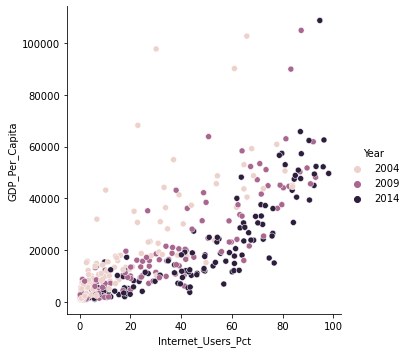

In [103]:
sns.relplot(data=gdp_int_pop_ltd, x="Internet_Users_Pct", y="GDP_Per_Capita", hue="Year");

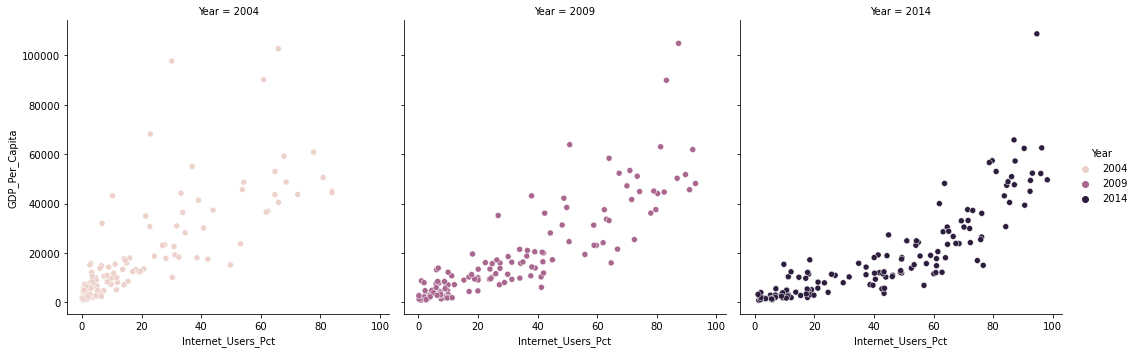

In [104]:
sns.relplot(data=gdp_int_pop_ltd, x="Internet_Users_Pct", y="GDP_Per_Capita", hue="Year", col="Year");

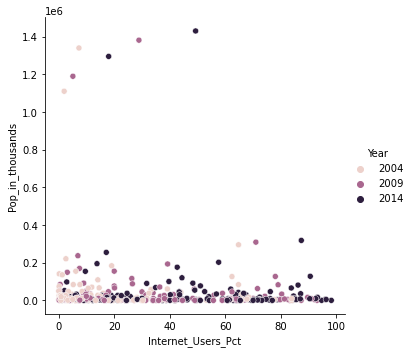

In [105]:
sns.relplot(data=gdp_int_pop_ltd, x="Internet_Users_Pct", y="Pop_in_thousands", hue="Year");

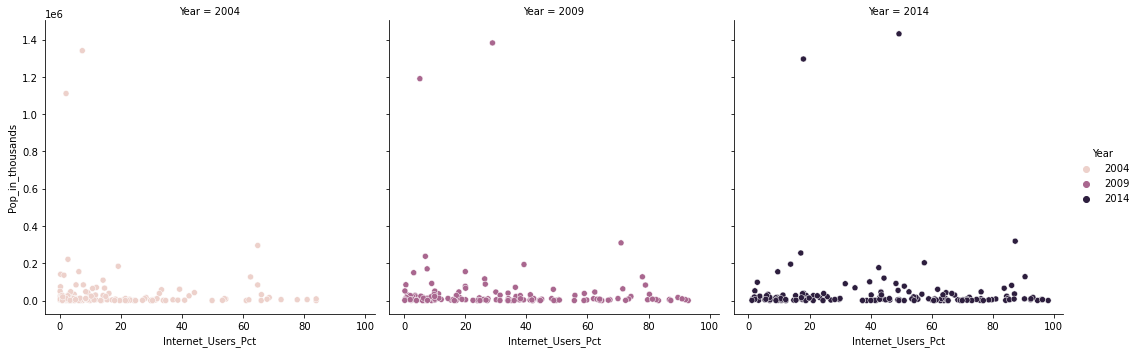

In [106]:
sns.relplot(data=gdp_int_pop_ltd, x="Internet_Users_Pct", y="Pop_in_thousands", hue="Year", col="Year");

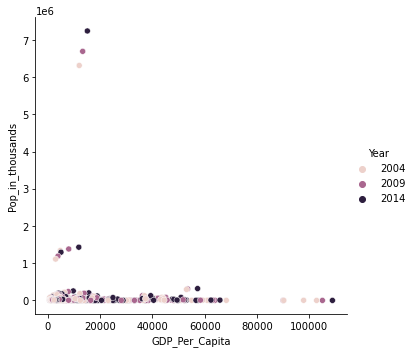

In [107]:
sns.relplot(data=gdp_int_pop_ltd, x="GDP_Per_Capita", y="Pop_in_thousands", hue="Year");

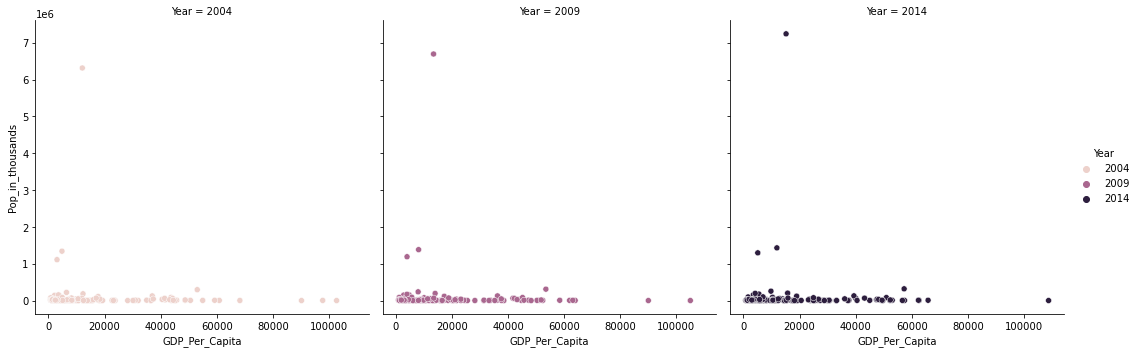

In [108]:
sns.relplot(data=gdp_int_pop_ltd, x="GDP_Per_Capita", y="Pop_in_thousands", hue="Year", col="Year");

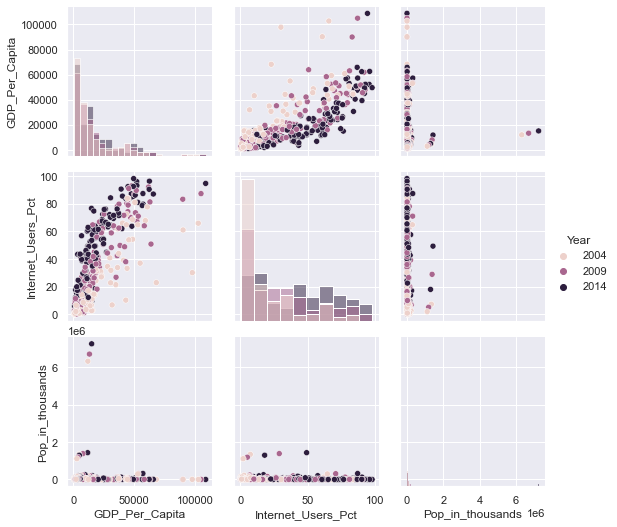

In [110]:
sns.set(font_scale=1)
g1 = sns.PairGrid(gdp_int_pop_ltd, hue="Year")
g1.map_diag(sns.histplot)
g1.map_offdiag(sns.scatterplot)
g1.add_legend();

In [111]:
giants = ["China", "India"]
gdp_int_pop_ltd_noci = gdp_int_pop_ltd.query("Country not in @giants")
gdp_int_pop_ltd_noci.sort_values(by="Pop_in_thousands")

,Country,Year,GDP_Per_Capita,Internet_Users_Pct,Pop_in_thousands
463,Saint Kitts and Nevis,2004,NaN,24.737678,48.00
461,Saint Kitts and Nevis,2014,NaN,65.400000,51.00
462,Saint Kitts and Nevis,2009,NaN,55.700000,52.00
49,Bermuda,2004,90195.811033,60.990867,64.00
48,Bermuda,2009,89961.982744,83.250000,65.00
...,...,...,...,...,...
419,United States,2009,53440.911538,71.000000,309492.00
418,United States,2014,57273.129074,87.360000,318673.00
432,World,2004,12077.823821,NaN,6313822.00
431,World,2009,13396.524163,NaN,6693385.00


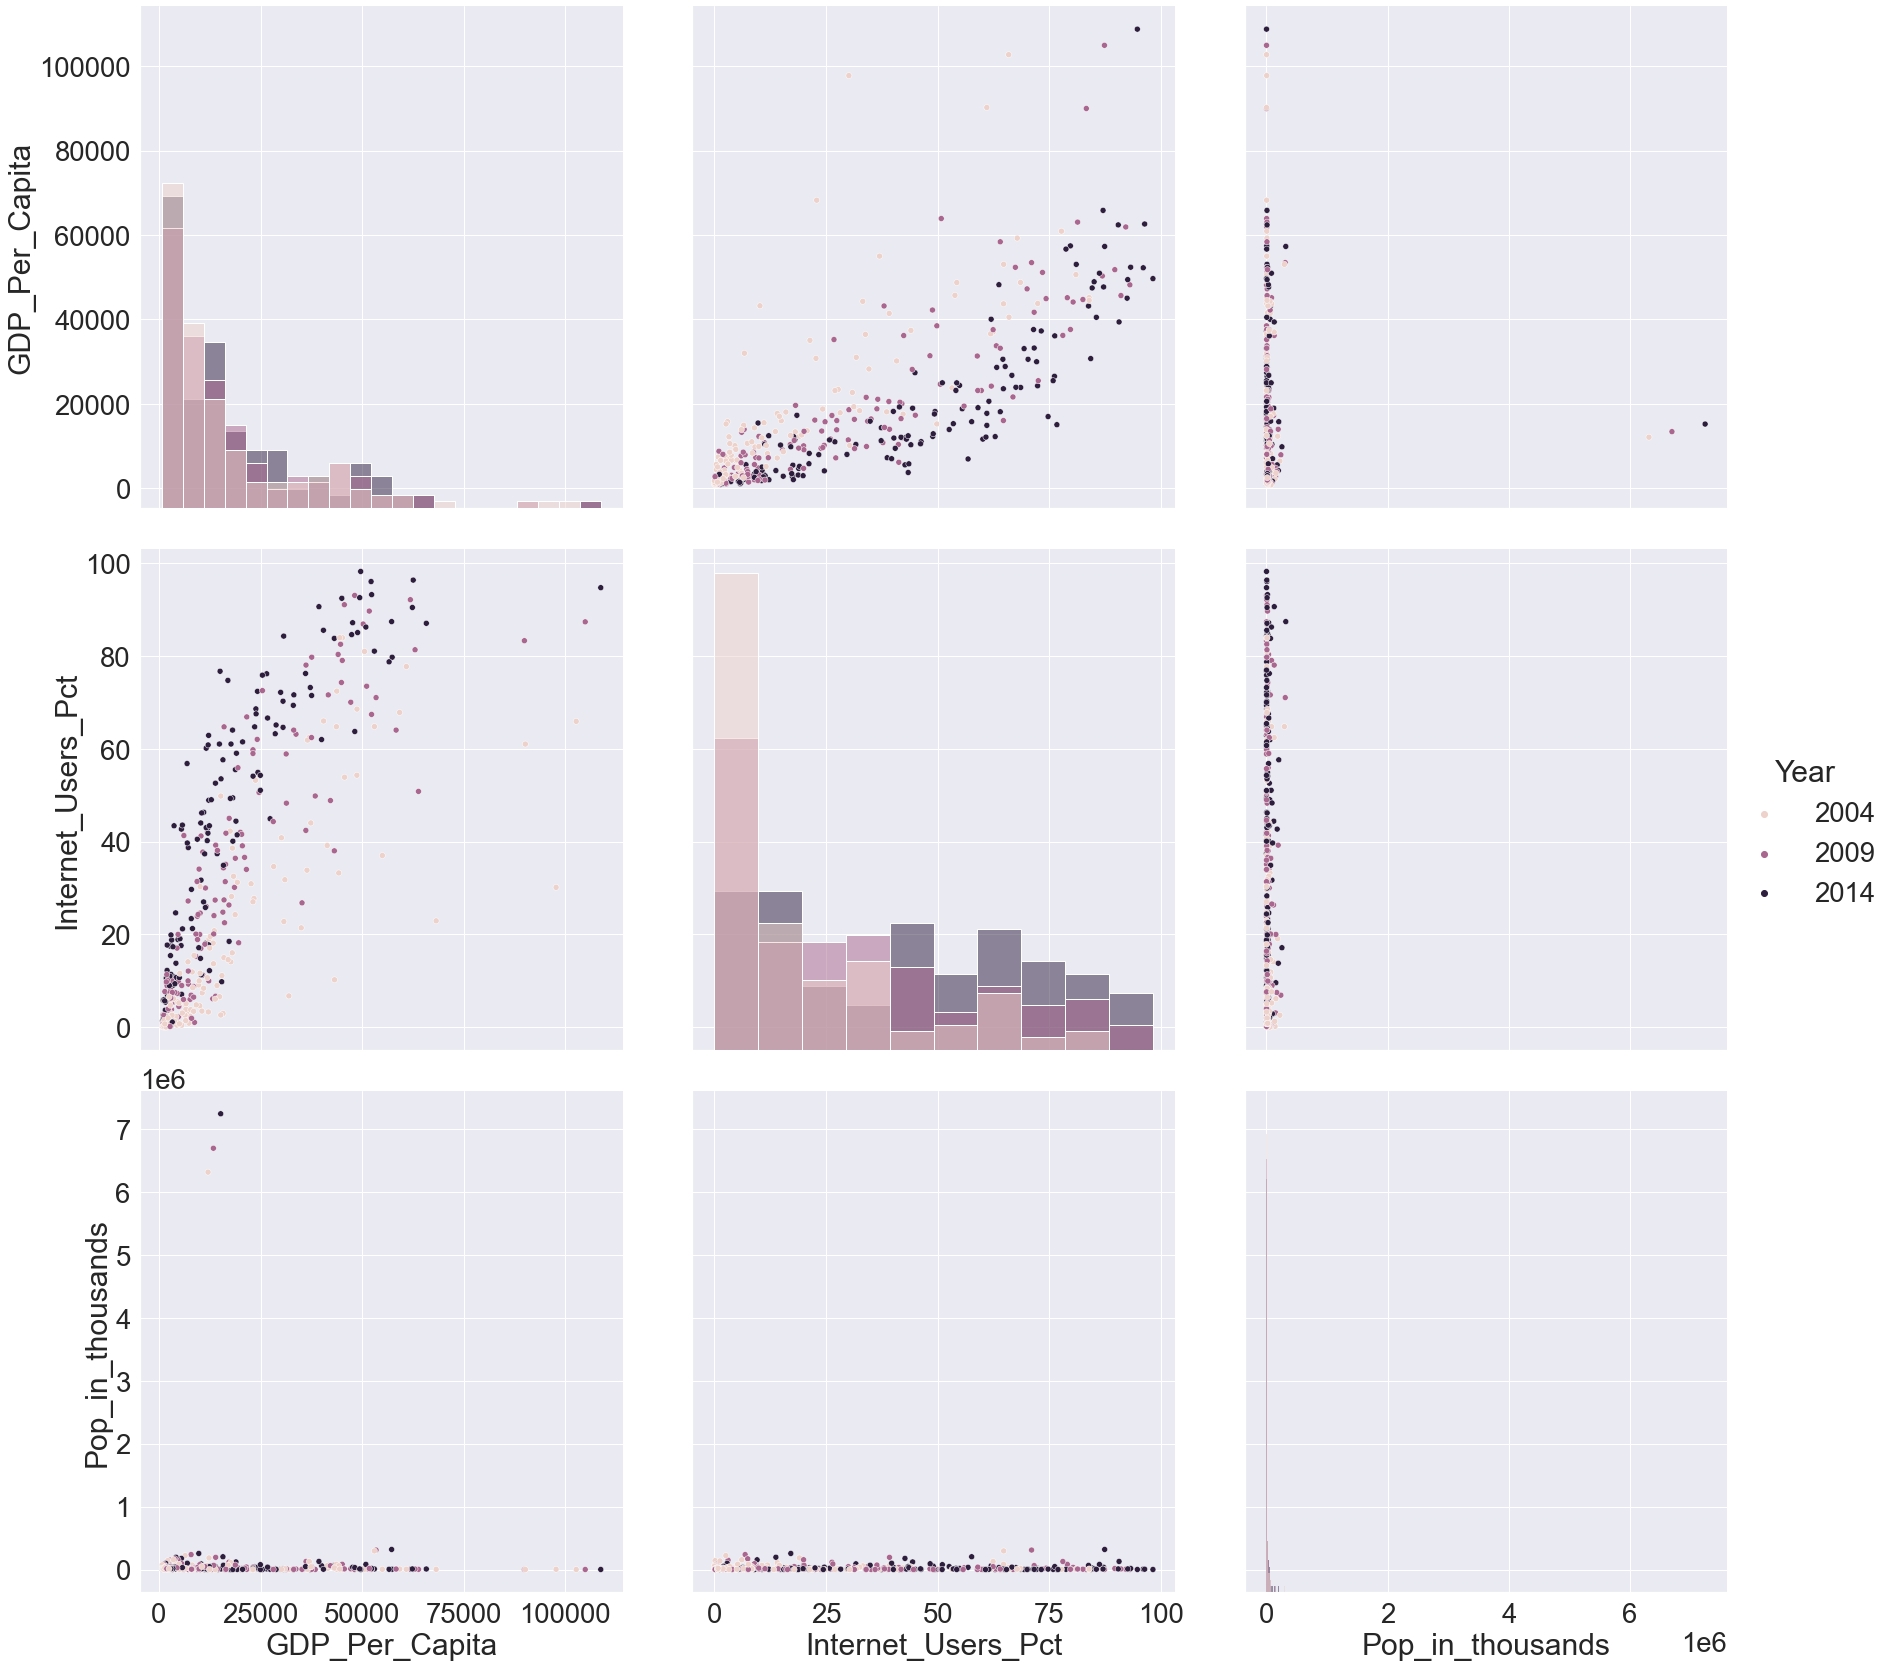

In [112]:
sns.set(font_scale=2.5)
pg = sns.PairGrid(gdp_int_pop_ltd_noci, hue="Year", height=8, aspect=8/8 )
pg.map_diag(sns.histplot)
pg.map_offdiag(sns.scatterplot)
pg.add_legend();

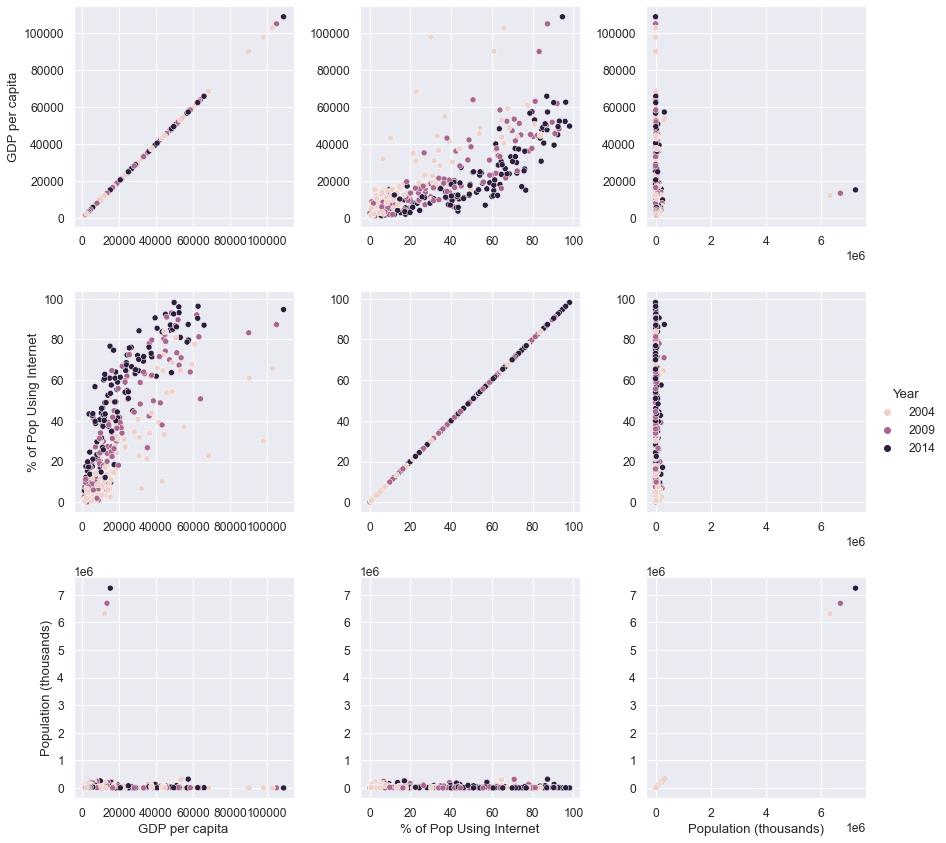

In [113]:
sns.set(font_scale=1.1)
pg3 = sns.PairGrid(gdp_int_pop_ltd_noci, hue="Year", height=4, aspect=1 )
pg3.map(sns.scatterplot)
pg3.axes[0, 0].yaxis.set_label_text('GDP per capita')
pg3.axes[1, 0].yaxis.set_label_text('% of Pop Using Internet')
pg3.axes[2, 0].yaxis.set_label_text('Population (thousands)')
pg3.axes[2, 0].xaxis.set_label_text('GDP per capita')
pg3.axes[2, 1].xaxis.set_label_text('% of Pop Using Internet')
pg3.axes[2, 2].xaxis.set_label_text('Population (thousands)')
pg3.add_legend()
for ax in pg3.axes.flat:
    ax.tick_params(axis='both', labelleft=True, labelbottom=True)
    
plt.subplots_adjust(wspace=0.3, hspace=0.3);

In [114]:
pg3.axes
### I'm not understanding why I can't make labels show up on the other "inside" axes even when I try to do so directly

array([[<AxesSubplot:xlabel='GDP_Per_Capita', ylabel='GDP per capita'>,
        <AxesSubplot:xlabel='Internet_Users_Pct', ylabel='GDP_Per_Capita'>,
        <AxesSubplot:xlabel='Pop_in_thousands', ylabel='GDP_Per_Capita'>],
       [<AxesSubplot:xlabel='GDP_Per_Capita', ylabel='% of Pop Using Internet'>,
        <AxesSubplot:xlabel='Internet_Users_Pct', ylabel='Internet_Users_Pct'>,
        <AxesSubplot:xlabel='Pop_in_thousands', ylabel='Internet_Users_Pct'>],
       [<AxesSubplot:xlabel='GDP per capita', ylabel='Population (thousands)'>,
        <AxesSubplot:xlabel='% of Pop Using Internet', ylabel='Pop_in_thousands'>,
        <AxesSubplot:xlabel='Population (thousands)', ylabel='Pop_in_thousands'>]],
      dtype=object)

In [115]:
urru_df = pd.read_csv('../data/urban_rural.csv', nrows = 68515)
urru_df

,Country or Area,Year,Area,Sex,Record Type,Reliability,Source Year,Value,Value Footnotes
0,Afghanistan,2020,Total,Both Sexes,Estimate - de facto,"Final figure, incomplete/questionable reliability",2021,31390171.0,1
1,Afghanistan,2020,Total,Male,Estimate - de facto,"Final figure, incomplete/questionable reliability",2021,15981303.0,1
2,Afghanistan,2020,Total,Female,Estimate - de facto,"Final figure, incomplete/questionable reliability",2021,15408868.0,1
3,Afghanistan,2020,Urban,Both Sexes,Estimate - de facto,"Final figure, incomplete/questionable reliability",2021,8023928.0,1
4,Afghanistan,2020,Urban,Male,Estimate - de facto,"Final figure, incomplete/questionable reliability",2021,4053789.0,1
...,...,...,...,...,...,...,...,...,...
68510,Zimbabwe,1954,Total,Both Sexes,Estimate - de facto,"Final figure, incomplete/questionable reliability",1969,3170000.0,NaN
68511,Zimbabwe,1953,Total,Both Sexes,Estimate - de facto,"Final figure, incomplete/questionable reliability",1978,2530000.0,NaN
68512,Zimbabwe,1952,Total,Both Sexes,Estimate - de facto,"Final figure, incomplete/questionable reliability",1978,2430000.0,NaN
68513,Zimbabwe,1951,Total,Both Sexes,Estimate - de facto,"Final figure, incomplete/questionable reliability",1978,2330000.0,NaN


In [116]:
urru_df = urru_df.drop(columns = ["Record Type", "Reliability", "Source Year", "Value Footnotes"])
urru_df = urru_df.rename(columns = {"Country or Area" : "Country",
                                    "Source Year" : "Year",
                                    "Value": "Area_Pop"})
urru_df

,Country,Year,Area,Sex,Area_Pop
0,Afghanistan,2020,Total,Both Sexes,31390171.0
1,Afghanistan,2020,Total,Male,15981303.0
2,Afghanistan,2020,Total,Female,15408868.0
3,Afghanistan,2020,Urban,Both Sexes,8023928.0
4,Afghanistan,2020,Urban,Male,4053789.0
...,...,...,...,...,...
68510,Zimbabwe,1954,Total,Both Sexes,3170000.0
68511,Zimbabwe,1953,Total,Both Sexes,2530000.0
68512,Zimbabwe,1952,Total,Both Sexes,2430000.0
68513,Zimbabwe,1951,Total,Both Sexes,2330000.0


In [117]:
urru_bs_df = urru_df.loc[urru_df["Sex"] == "Both Sexes"]
urru_bs_df = urru_bs_df.drop(columns = ["Sex"])
urru_bs_df

,Country,Year,Area,Area_Pop
0,Afghanistan,2020,Total,31390171.0
3,Afghanistan,2020,Urban,8023928.0
6,Afghanistan,2020,Rural,23366243.0
9,Afghanistan,2019,Total,30725560.0
12,Afghanistan,2019,Urban,7761765.0
...,...,...,...,...
68510,Zimbabwe,1954,Total,3170000.0
68511,Zimbabwe,1953,Total,2530000.0
68512,Zimbabwe,1952,Total,2430000.0
68513,Zimbabwe,1951,Total,2330000.0


In [118]:
urban_bs_df = urru_bs_df.loc[urru_bs_df["Area"] == "Urban"]
urban_bs_df = urban_bs_df.rename(columns = {"Area_Pop" : "Urban_Pop"})
urban_bs_df = urban_bs_df.drop(columns = ["Area"])
urban_bs_df = urban_bs_df.reset_index(drop=True)
urban_bs_df

,Country,Year,Urban_Pop
0,Afghanistan,2020,8023928.0
1,Afghanistan,2019,7761765.0
2,Afghanistan,2018,7507953.0
3,Afghanistan,2017,7148224.0
4,Afghanistan,2016,6919560.0
...,...,...,...
5824,Zimbabwe,1979,1538000.0
5825,Zimbabwe,1978,1262000.0
5826,Zimbabwe,1977,1206000.0
5827,Zimbabwe,1976,1154000.0


In [119]:
rural_bs_df = urru_bs_df.loc[urru_bs_df["Area"] == "Rural"]
rural_bs_df = rural_bs_df.rename(columns = {"Area_Pop" : "Rural_Pop"})
rural_bs_df = rural_bs_df.drop(columns = "Area")
rural_bs_df = rural_bs_df.reset_index(drop=True)
rural_bs_df

,Country,Year,Rural_Pop
0,Afghanistan,2020,23366243.0
1,Afghanistan,2019,22963795.0
2,Afghanistan,2018,22567065.0
3,Afghanistan,2017,21076099.0
4,Afghanistan,2016,20737585.0
...,...,...,...
5783,Zimbabwe,1979,5392000.0
5784,Zimbabwe,1978,5458000.0
5785,Zimbabwe,1977,5314000.0
5786,Zimbabwe,1976,5176000.0


In [120]:
total_bs_df = urru_bs_df.loc[urru_bs_df["Area"] == "Total"]
total_bs_df = total_bs_df.rename(columns = {"Area_Pop" : "Total_Pop"})
total_bs_df = total_bs_df.drop(columns = "Area")
total_bs_df = total_bs_df.reset_index(drop=True)
total_bs_df

,Country,Year,Total_Pop
0,Afghanistan,2020,31390171.0
1,Afghanistan,2019,30725560.0
2,Afghanistan,2018,30075018.0
3,Afghanistan,2017,28224323.0
4,Afghanistan,2016,27657145.0
...,...,...,...
17559,Zimbabwe,1954,3170000.0
17560,Zimbabwe,1953,2530000.0
17561,Zimbabwe,1952,2430000.0
17562,Zimbabwe,1951,2330000.0


In [121]:
urru_col = pd.concat([rural_bs_df, urban_bs_df, total_bs_df], axis=1)
urru_col

,Country,Year,Rural_Pop,Country,Year,Urban_Pop,Country,Year,Total_Pop
0,Afghanistan,2020.0,23366243.0,Afghanistan,2020.0,8023928.0,Afghanistan,2020,31390171.0
1,Afghanistan,2019.0,22963795.0,Afghanistan,2019.0,7761765.0,Afghanistan,2019,30725560.0
2,Afghanistan,2018.0,22567065.0,Afghanistan,2018.0,7507953.0,Afghanistan,2018,30075018.0
3,Afghanistan,2017.0,21076099.0,Afghanistan,2017.0,7148224.0,Afghanistan,2017,28224323.0
4,Afghanistan,2016.0,20737585.0,Afghanistan,2016.0,6919560.0,Afghanistan,2016,27657145.0
...,...,...,...,...,...,...,...,...,...
17559,NaN,NaN,NaN,NaN,NaN,NaN,Zimbabwe,1954,3170000.0
17560,NaN,NaN,NaN,NaN,NaN,NaN,Zimbabwe,1953,2530000.0
17561,NaN,NaN,NaN,NaN,NaN,NaN,Zimbabwe,1952,2430000.0
17562,NaN,NaN,NaN,NaN,NaN,NaN,Zimbabwe,1951,2330000.0


I saw the above referenced in stack overflow when I searched for how to combind more than 2 dataframes at once. I realize in retrospect that this could have worked If I'd renamed the country and year columns for each of my split out tables, then I could have dropped the repeats. I'm going to try a merge option I read about next.

In [122]:
from functools import reduce

In [123]:
urru_merge = reduce(lambda left, right:
                    pd.merge(left, right,
                             on = ["Country", "Year"]),
                    [rural_bs_df, urban_bs_df, total_bs_df])
urru_merge

,Country,Year,Rural_Pop,Urban_Pop,Total_Pop
0,Afghanistan,2020,23366243.0,8023928.0,31390171.0
1,Afghanistan,2019,22963795.0,7761765.0,30725560.0
2,Afghanistan,2018,22567065.0,7507953.0,30075018.0
3,Afghanistan,2017,21076099.0,7148224.0,28224323.0
4,Afghanistan,2016,20737585.0,6919560.0,27657145.0
...,...,...,...,...,...
11962,Zimbabwe,1977,5314000.0,1206000.0,6520000.0
11963,Zimbabwe,1976,5176000.0,1154000.0,6330000.0
11964,Zimbabwe,1969,4246000.0,884000.0,228296.0
11965,Zimbabwe,1969,4246000.0,884000.0,15153.0


In [124]:
urru_merge["Pct_Rural"] = (urru_merge["Rural_Pop"]/urru_merge["Total_Pop"])*100
urru_merge.head()

,Country,Year,Rural_Pop,Urban_Pop,Total_Pop,Pct_Rural
0,Afghanistan,2020,23366243.0,8023928.0,31390171.0,74.438088
1,Afghanistan,2019,22963795.0,7761765.0,30725560.0,74.738410
2,Afghanistan,2018,22567065.0,7507953.0,30075018.0,75.035915
3,Afghanistan,2017,21076099.0,7148224.0,28224323.0,74.673532
4,Afghanistan,2016,20737585.0,6919560.0,27657145.0,74.980932


In [125]:
urru_merge["Pct_Urban"] = (urru_merge["Urban_Pop"]/urru_merge["Total_Pop"])*100
urru_merge.head()

,Country,Year,Rural_Pop,Urban_Pop,Total_Pop,Pct_Rural,Pct_Urban
0,Afghanistan,2020,23366243.0,8023928.0,31390171.0,74.438088,25.561912
1,Afghanistan,2019,22963795.0,7761765.0,30725560.0,74.738410,25.261590
2,Afghanistan,2018,22567065.0,7507953.0,30075018.0,75.035915,24.964085
3,Afghanistan,2017,21076099.0,7148224.0,28224323.0,74.673532,25.326468
4,Afghanistan,2016,20737585.0,6919560.0,27657145.0,74.980932,25.019068


In [126]:
urru_merge = urru_merge.round({"Pct_Rural" : 2 , "Pct_Urban" : 2})

In [127]:
urru_merge

,Country,Year,Rural_Pop,Urban_Pop,Total_Pop,Pct_Rural,Pct_Urban
0,Afghanistan,2020,23366243.0,8023928.0,31390171.0,74.44,25.56
1,Afghanistan,2019,22963795.0,7761765.0,30725560.0,74.74,25.26
2,Afghanistan,2018,22567065.0,7507953.0,30075018.0,75.04,24.96
3,Afghanistan,2017,21076099.0,7148224.0,28224323.0,74.67,25.33
4,Afghanistan,2016,20737585.0,6919560.0,27657145.0,74.98,25.02
...,...,...,...,...,...,...,...
11962,Zimbabwe,1977,5314000.0,1206000.0,6520000.0,81.50,18.50
11963,Zimbabwe,1976,5176000.0,1154000.0,6330000.0,81.77,18.23
11964,Zimbabwe,1969,4246000.0,884000.0,228296.0,1859.87,387.22
11965,Zimbabwe,1969,4246000.0,884000.0,15153.0,28020.85,5833.83


In [128]:
urru_merge.query("Pct_Rural >= 100")

,Country,Year,Rural_Pop,Urban_Pop,Total_Pop,Pct_Rural,Pct_Urban
867,Bangladesh,1961,51889988.0,2640726.0,50853721.0,102.04,5.19
1402,Botswana,1964,525828.0,17277.0,517374.0,101.63,3.34
1779,Burundi,1990,5185574.0,333044.0,5139073.0,100.90,6.48
1782,Burundi,1990,5185574.0,272925.0,5139073.0,100.90,5.31
5460,Jordan,1961,957935.0,748291.0,900800.0,106.34,83.07
5462,Jordan,1952,846740.0,482434.0,586200.0,144.45,82.30
6021,Lesotho,1976,1080613.0,136202.0,1064188.0,101.54,12.80
6092,Liberia,1962,815640.0,200803.0,785456.0,103.84,25.57
6094,Liberia,1962,815640.0,15373.0,785456.0,103.84,1.96
11733,Vanuatu,1966,66610.0,9522.0,63448.0,104.98,15.01


In [129]:
urru_merge.query("Pct_Urban >= 100")

,Country,Year,Rural_Pop,Urban_Pop,Total_Pop,Pct_Rural,Pct_Urban
6544,Malta,2005,418.0,404544.0,403879.0,0.10,100.16
6546,Malta,1995,369.0,377763.0,371173.0,0.10,101.78
9044,San Marino,1970,1456.0,17733.0,17726.0,8.21,100.04
11964,Zimbabwe,1969,4246000.0,884000.0,228296.0,1859.87,387.22
11965,Zimbabwe,1969,4246000.0,884000.0,15153.0,28020.85,5833.83


In [130]:
urru_merge.query("Pct_Rural+Pct_Urban != 100")

,Country,Year,Rural_Pop,Urban_Pop,Total_Pop,Pct_Rural,Pct_Urban
43,Afghanistan,1979,11037231.0,2018946.0,13051358.0,84.57,15.47
44,Afghanistan,1979,11037231.0,2018946.0,13051358.0,84.57,15.47
45,Afghanistan,1979,11032412.0,2014127.0,13051358.0,84.53,15.43
46,Afghanistan,1979,11032412.0,2014127.0,13051358.0,84.53,15.43
49,Åland Islands,2020,18314.5,11692.0,30005.5,61.04,38.97
...,...,...,...,...,...,...,...
11957,Zimbabwe,1981,5917000.0,1443000.0,7600000.0,77.86,18.99
11959,Zimbabwe,1979,5392000.0,1538000.0,7130000.0,75.62,21.57
11961,Zimbabwe,1978,5458000.0,1262000.0,6930000.0,78.76,18.21
11964,Zimbabwe,1969,4246000.0,884000.0,228296.0,1859.87,387.22
